In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()


Saving HDFC_15min_FINAL.csv to HDFC_15min_FINAL.csv


In [4]:
raw_data=pd.read_csv('HDFC_15min_FINAL.csv')

In [5]:
uploaded

{'HDFC_15min_FINAL.csv': b'Datetime,Open,High,Low,Close,Volume,EMA\r\n2021-04-26 09:15:00+05:30,2500,2532.4,2493.85,2520.85,472955,0\r\n2021-04-26 09:30:00+05:30,2520.85,2532,2516.8,2517.3,210077,0\r\n2021-04-26 09:45:00+05:30,2517.3,2526.9,2512.8,2524.65,449850,0\r\n2021-04-26 10:00:00+05:30,2524.35,2526,2506.15,2507.4,93810,0\r\n2021-04-26 10:15:00+05:30,2507.75,2513.75,2494.25,2498.85,130290,0\r\n2021-04-26 10:30:00+05:30,2498.85,2506.1,2490.3,2505,120193,0\r\n2021-04-26 10:45:00+05:30,2504.6,2510.55,2501.2,2509.6,111249,0\r\n2021-04-26 11:00:00+05:30,2510,2514.65,2502.5,2505.55,94854,0\r\n2021-04-26 11:15:00+05:30,2505.55,2506,2498.25,2501.1,76491,0\r\n2021-04-26 11:30:00+05:30,2501.1,2504,2499.5,2501.05,86516,0\r\n2021-04-26 11:45:00+05:30,2501.05,2504.5,2499.45,2501.3,70924,0\r\n2021-04-26 12:00:00+05:30,2501.4,2502.7,2498,2499.75,96241,0\r\n2021-04-26 12:15:00+05:30,2499.75,2503,2495.35,2500.85,88428,0\r\n2021-04-26 12:30:00+05:30,2500.85,2502.9,2497.9,2499.9,92935,0\r\n2021-04-

In [6]:
raw_data

,Datetime,Open,High,Low,Close,Volume,EMA
0,2021-04-26 09:15:00+05:30,2500.00,2532.40,2493.85,2520.85,472955,0
1,2021-04-26 09:30:00+05:30,2520.85,2532.00,2516.80,2517.30,210077,0
2,2021-04-26 09:45:00+05:30,2517.30,2526.90,2512.80,2524.65,449850,0
3,2021-04-26 10:00:00+05:30,2524.35,2526.00,2506.15,2507.40,93810,0
4,2021-04-26 10:15:00+05:30,2507.75,2513.75,2494.25,2498.85,130290,0
...,...,...,...,...,...,...,...
6299,2022-04-29 14:15:00+05:30,2260.90,2263.10,2242.30,2254.05,220832,0
6300,2022-04-29 14:30:00+05:30,2255.00,2262.75,2251.35,2262.75,173173,0
6301,2022-04-29 14:45:00+05:30,2262.90,2265.55,2256.70,2262.10,162216,0
6302,2022-04-29 15:00:00+05:30,2262.05,2262.05,2223.10,2226.50,800725,0


In [7]:
time = []
for i in raw_data['Datetime']:
    date_list = i.split("+")
    time.append(date_list[0])

raw_data['Datetime']=time

In [8]:
raw_data.rename(
    {'Datetime':'time',
     'Open': 'open',
    'High': 'high',
    'Low' : 'low',
    'Close':'close',
    'Volume' : 'volume'},
    axis=1,
    inplace=True)

In [9]:
print(raw_data.shape)
raw_data.head()

(6304, 7)


,time,open,high,low,close,volume,EMA
0,2021-04-26 09:15:00,2500.00,2532.40,2493.85,2520.85,472955,0
1,2021-04-26 09:30:00,2520.85,2532.00,2516.80,2517.30,210077,0
2,2021-04-26 09:45:00,2517.30,2526.90,2512.80,2524.65,449850,0
3,2021-04-26 10:00:00,2524.35,2526.00,2506.15,2507.40,93810,0
4,2021-04-26 10:15:00,2507.75,2513.75,2494.25,2498.85,130290,0


In [10]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

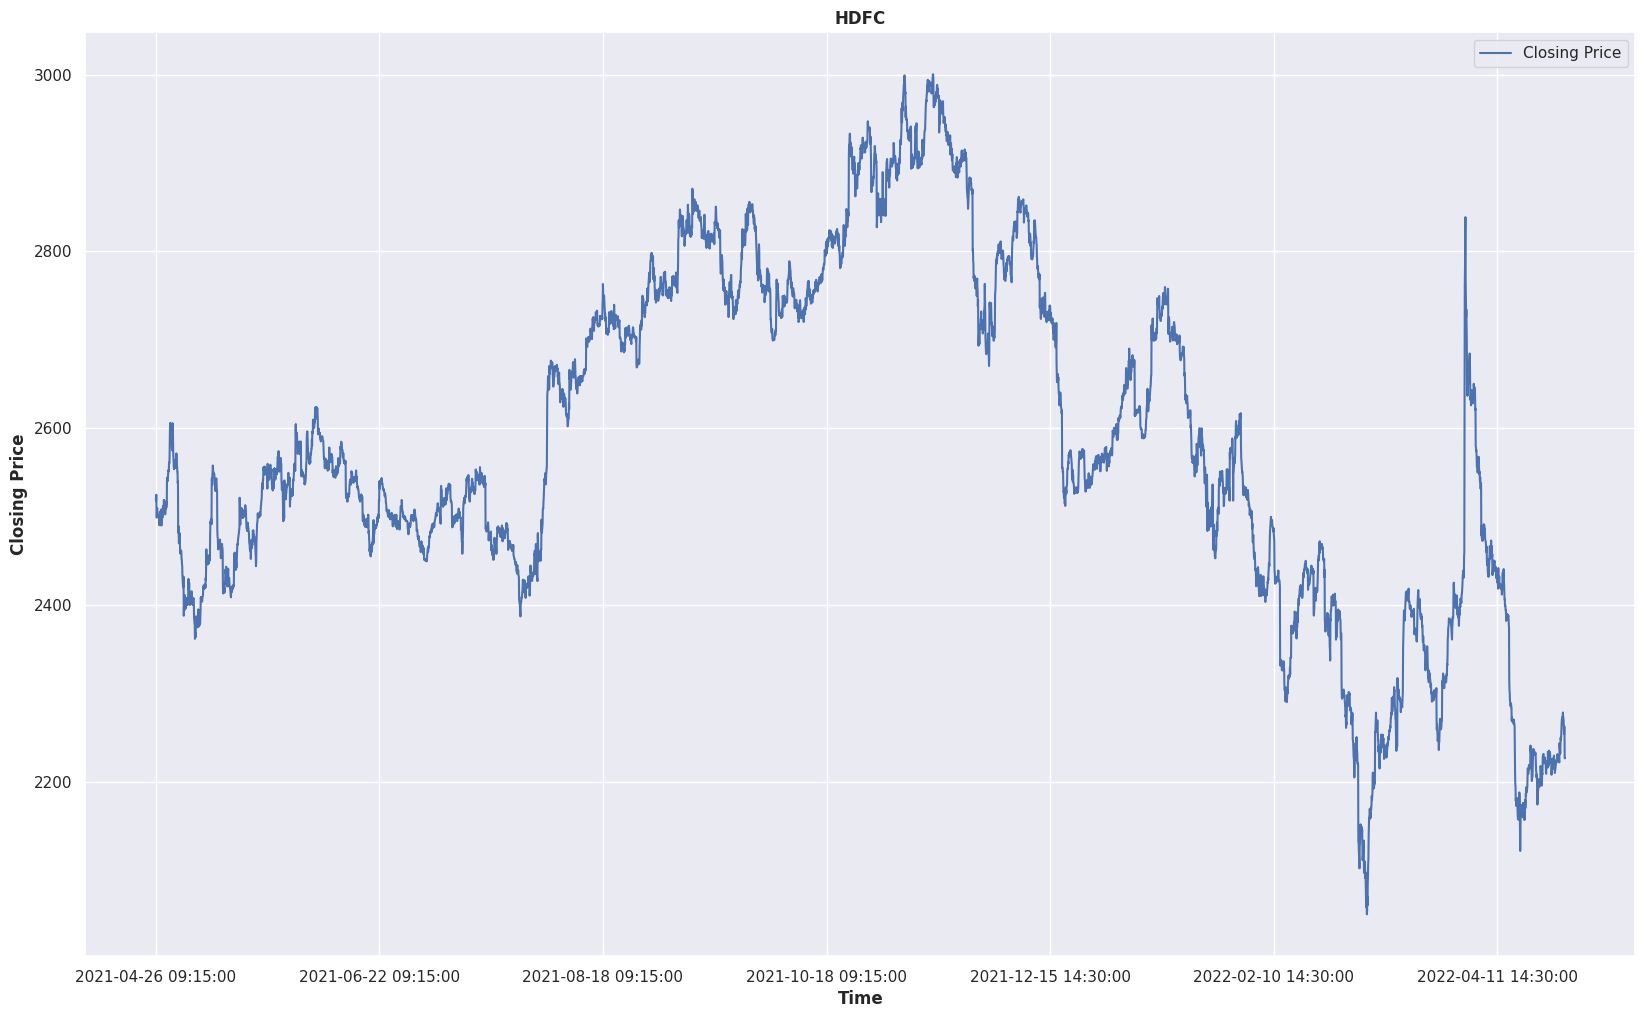

In [12]:
close_ds.plot(x='time', y='close', figsize=(20, 12))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.title("HDFC", fontweight='bold')
plt.legend(['Closing Price'])

In [13]:
from time import time
from datetime import datetime

"""
  Parameters
    d - previous number of data points to use for EMA
    price - stock price list
  Returns
    list of EMA of all points starting from the dth data point
"""
def calculate_ema(d, price) :
  print(f" Days {d} \n Length of prices {len(price)}")
  # formula https://www.investopedia.com/terms/e/ema.asp
  ema = []                                    # stores the ema starting from the dth data point i.e corresponding to price[d]
  ema_yesterday = sum(price[:d])/d            # sma of first d days, this will serve as the EMA of yesterday
  multiplier = 2/(d+1)                        # multiplier
  for i in range(d,len(price)):
    ema_today = price[i]*multiplier + ema_yesterday*(1-multiplier)
    ema.append(ema_today)
    ema_yesterday = ema_today
  print(f" Length of EMA list {len(ema)}")
  return ema



"""
  Parameters
    df - original dataframe
  Returns
    list of vwap
"""

def calculate_vwap(df):

  time_format = "%Y-%m-%d %H:%M:%S"

  sum_pv = 0
  sum_volume = 0

  vwap = []

  previous_day = datetime.strptime(df["time"][0], time_format).day

  for i in range(len(df)):

    current_day = datetime.strptime(df["time"][i], time_format).day

    if(current_day!=previous_day):
      sum_pv = 0
      sum_volume = 0

    previous_day = current_day

    sum_pv += ((df["high"][i] + df["low"][i] + df["close"][i])/3) * df["volume"][i]
    sum_volume += df["volume"][i]
    vwap.append(sum_pv/sum_volume)
  return vwap

In [14]:
# price list
price = list(close_ds.drop('time', axis=1).values)
print(f"len prices = {len(price)}")

# ema taking 10 previous points for calculation
ema = calculate_ema(10,price)
print(f"len ema = {len(ema)}")

vwap = calculate_vwap(raw_data)
print(f"len vwap = {len(vwap)}")

len prices = 6304
 Days 10 
 Length of prices 6304
 Length of EMA list 6294
len ema = 6294
len vwap = 6304


In [15]:
# make all ema, vwap, prices lists of equal length
price = price[-len(ema):]
vwap = vwap[-len(ema):]

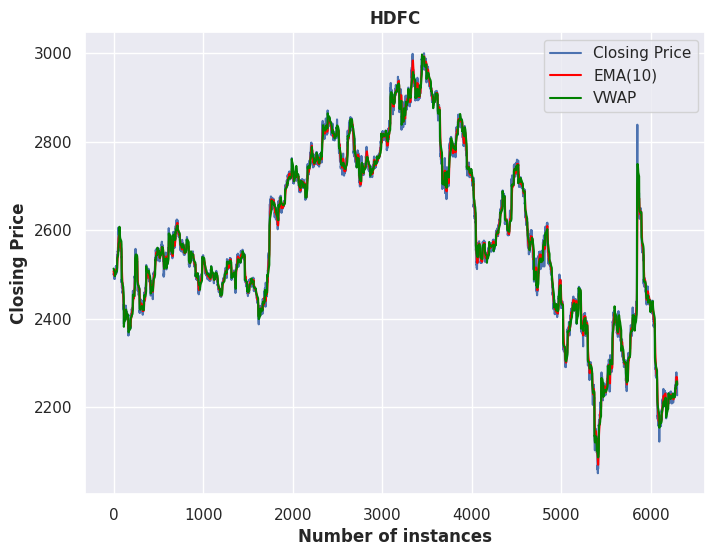

In [17]:
plt.figure(figsize=(8,6))
plt.title("HDFC", fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
plt.plot(price)
plt.plot(ema, color='red')
plt.plot(vwap,color='green')
plt.legend(['Closing Price','EMA(10)','VWAP'])
plt.show()

In [18]:
# split a multivariate sequence into samples
# n_steps ---> number of lag observations

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [19]:
ema = np.array(ema).reshape(len(ema), 1)
vwap = np.array(vwap).reshape(len(vwap), 1)
price = np.array(price).reshape(len(price), 1)
dataset = np.hstack((ema, vwap, price))
print(dataset)

[[2507.71045455 2513.14143589 2501.3       ]
 [2506.26309917 2512.52045758 2499.75      ]
 [2505.27889932 2511.98249114 2500.85      ]
 ...
 [2263.83158843 2257.83154803 2262.1       ]
 [2257.04402689 2254.33903617 2226.5       ]
 [2251.58147655 2250.1485017  2227.        ]]


In [20]:
n_steps = 3
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
print(X[0], y[0])

(6292, 3, 3) (6292,)
[[2507.71045455 2513.14143589 2501.3       ]
 [2506.26309917 2512.52045758 2499.75      ]
 [2505.27889932 2511.98249114 2500.85      ]] 2500.85


In [21]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# type(X_train.values)

(4404, 3, 3)
(4404,)
(1888, 3, 3)
(1888,)


In [22]:
X_test

array([[[2597.36614493, 2599.5618631 , 2591.9       ],
        [2596.61775495, 2599.45808454, 2593.25      ],
        [2595.77816314, 2599.04403697, 2592.        ]],

       [[2596.61775495, 2599.45808454, 2593.25      ],
        [2595.77816314, 2599.04403697, 2592.        ],
        [2594.72758802, 2598.76542057, 2590.        ]],

       [[2595.77816314, 2599.04403697, 2592.        ],
        [2594.72758802, 2598.76542057, 2590.        ],
        [2593.57711747, 2598.44699932, 2588.4       ]],

       ...,

       [[2264.54224938, 2257.61410956, 2254.05      ],
        [2264.21638585, 2257.67558039, 2262.75      ],
        [2263.83158843, 2257.83154803, 2262.1       ]],

       [[2264.21638585, 2257.67558039, 2262.75      ],
        [2263.83158843, 2257.83154803, 2262.1       ],
        [2257.04402689, 2254.33903617, 2226.5       ]],

       [[2263.83158843, 2257.83154803, 2262.1       ],
        [2257.04402689, 2254.33903617, 2226.5       ],
        [2251.58147655, 2250.1485017 , 222

In [23]:
print(X_test)

[[[2597.36614493 2599.5618631  2591.9       ]
  [2596.61775495 2599.45808454 2593.25      ]
  [2595.77816314 2599.04403697 2592.        ]]

 [[2596.61775495 2599.45808454 2593.25      ]
  [2595.77816314 2599.04403697 2592.        ]
  [2594.72758802 2598.76542057 2590.        ]]

 [[2595.77816314 2599.04403697 2592.        ]
  [2594.72758802 2598.76542057 2590.        ]
  [2593.57711747 2598.44699932 2588.4       ]]

 ...

 [[2264.54224938 2257.61410956 2254.05      ]
  [2264.21638585 2257.67558039 2262.75      ]
  [2263.83158843 2257.83154803 2262.1       ]]

 [[2264.21638585 2257.67558039 2262.75      ]
  [2263.83158843 2257.83154803 2262.1       ]
  [2257.04402689 2254.33903617 2226.5       ]]

 [[2263.83158843 2257.83154803 2262.1       ]
  [2257.04402689 2254.33903617 2226.5       ]
  [2251.58147655 2250.1485017  2227.        ]]]


In [24]:
print(y_test)

[2592.  2590.  2588.4 ... 2262.1 2226.5 2227. ]


In [25]:
# flattening input for model feeding

# n_input = X_train.shape[1] * X_train.shape[2]
# X_train_flattened = X_train.reshape((X_train.shape[0], n_input))
# X_test_flattened = X_test.reshape((X_test.shape[0], n_input))
# print(X_train_flattened.shape)
# print(X_test_flattened.shape)

In [27]:
# Model training

from tensorflow import keras
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import LSTM
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Bidirectional

# Vanilla LSTM

model_lstm_vanilla = Sequential()
model_lstm_vanilla.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_vanilla.add(Dense(1))
model_lstm_vanilla.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0003))
model_lstm_vanilla.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Stacked LSTM

model_lstm_stacked = Sequential()
model_lstm_stacked.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_stacked.add(LSTM(50, activation='relu'))
model_lstm_stacked.add(Dense(1))
model_lstm_stacked.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='mse')
model_lstm_stacked.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 3, 50)               │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Bidirectional LSTM

model_lstm_bidirectional = Sequential()
model_lstm_bidirectional.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_bidirectional.add(Dense(1))
model_lstm_bidirectional.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='mse')
model_lstm_bidirectional.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional)      │ (None, 100)                 │          21,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,701 (84.77 KB)

 Trainable params: 21,701 (84.77 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
lstm_vanilla_history = model_lstm_vanilla.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
138/138 - 4s - 30ms/step - loss: 8345909.5000 - val_loss: 6559796.5000
Epoch 2/50
138/138 - 3s - 20ms/step - loss: 7724677.5000 - val_loss: 6163294.0000
Epoch 3/50
138/138 - 1s - 4ms/step - loss: 7382459.5000 - val_loss: 6008500.0000
Epoch 4/50
138/138 - 0s - 3ms/step - loss: 7247662.0000 - val_loss: 5921499.5000
Epoch 5/50
138/138 - 1s - 6ms/step - loss: 7159466.5000 - val_loss: 5856244.5000
Epoch 6/50
138/138 - 1s - 4ms/step - loss: 7102880.0000 - val_loss: 5840462.0000
Epoch 7/50
138/138 - 1s - 4ms/step - loss: 7101118.0000 - val_loss: 5840264.5000
Epoch 8/50
138/138 - 1s - 5ms/step - loss: 7100900.0000 - val_loss: 5840067.5000
Epoch 9/50
138/138 - 1s - 4ms/step - loss: 7100682.5000 - val_loss: 5839871.0000
Epoch 10/50
138/138 - 1s - 4ms/step - loss: 7100465.5000 - val_loss: 5839671.5000
Epoch 11/50
138/138 - 0s - 3ms/step - loss: 7100247.0000 - val_loss: 5839473.0000
Epoch 12/50
138/138 - 0s - 3ms/step - loss: 7100028.5000 - val_loss: 5839274.5000
Epoch 13/50
138/138 - 0

In [33]:
lstm_stacked_history = model_lstm_stacked.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
138/138 - 7s - 47ms/step - loss: 6519204.0000 - val_loss: 4072518.0000
Epoch 2/50
138/138 - 1s - 4ms/step - loss: 2017084.2500 - val_loss: 525.8929
Epoch 3/50
138/138 - 1s - 4ms/step - loss: 724.0389 - val_loss: 308.5877
Epoch 4/50
138/138 - 1s - 4ms/step - loss: 132.2573 - val_loss: 308.1810
Epoch 5/50
138/138 - 1s - 4ms/step - loss: 132.4871 - val_loss: 308.5868
Epoch 6/50
138/138 - 0s - 4ms/step - loss: 132.4902 - val_loss: 307.7625
Epoch 7/50
138/138 - 0s - 3ms/step - loss: 132.2851 - val_loss: 307.5814
Epoch 8/50
138/138 - 1s - 5ms/step - loss: 132.1830 - val_loss: 308.2523
Epoch 9/50
138/138 - 1s - 5ms/step - loss: 132.0811 - val_loss: 307.9331
Epoch 10/50
138/138 - 1s - 4ms/step - loss: 132.2855 - val_loss: 307.3401
Epoch 11/50
138/138 - 1s - 5ms/step - loss: 132.2805 - val_loss: 307.8810
Epoch 12/50
138/138 - 0s - 3ms/step - loss: 132.4854 - val_loss: 308.0568
Epoch 13/50
138/138 - 0s - 3ms/step - loss: 132.2489 - val_loss: 306.8386
Epoch 14/50
138/138 - 1s - 5ms/ste

In [34]:
lstm_bidirectional_history = model_lstm_bidirectional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
138/138 - 5s - 39ms/step - loss: 1830828.7500 - val_loss: 16654.6992
Epoch 2/50
138/138 - 1s - 4ms/step - loss: 1867.6636 - val_loss: 389.8579
Epoch 3/50
138/138 - 0s - 3ms/step - loss: 103.4650 - val_loss: 357.5227
Epoch 4/50
138/138 - 0s - 3ms/step - loss: 264.1589 - val_loss: 2695.2324
Epoch 5/50
138/138 - 1s - 4ms/step - loss: 90.8789 - val_loss: 359.4524
Epoch 6/50
138/138 - 1s - 5ms/step - loss: 65.2035 - val_loss: 331.6636
Epoch 7/50
138/138 - 0s - 3ms/step - loss: 67.0195 - val_loss: 333.2848
Epoch 8/50
138/138 - 1s - 5ms/step - loss: 64.8036 - val_loss: 335.7545
Epoch 9/50
138/138 - 1s - 5ms/step - loss: 62.2477 - val_loss: 314.8860
Epoch 10/50
138/138 - 1s - 4ms/step - loss: 71.1471 - val_loss: 510.9811
Epoch 11/50
138/138 - 1s - 5ms/step - loss: 61.7641 - val_loss: 699.3748
Epoch 12/50
138/138 - 1s - 4ms/step - loss: 48.9003 - val_loss: 1836.7581
Epoch 13/50
138/138 - 1s - 5ms/step - loss: 41.5101 - val_loss: 829.9350
Epoch 14/50
138/138 - 1s - 4ms/step - loss: 40

Text(0, 0.5, 'MSE')

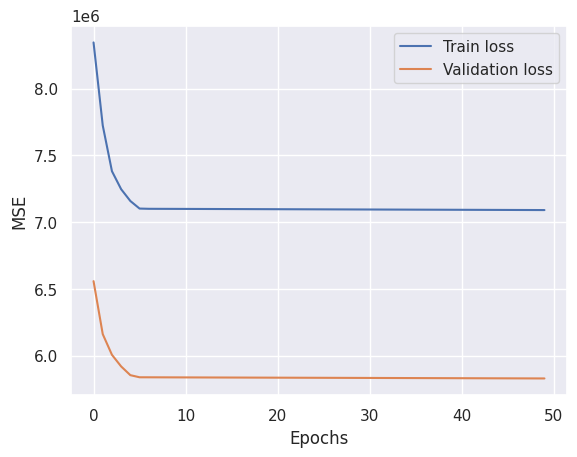

In [35]:
# plots
fig = plt.figure()
plt.plot(lstm_vanilla_history.history['loss'], label='Train loss')
plt.plot(lstm_vanilla_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

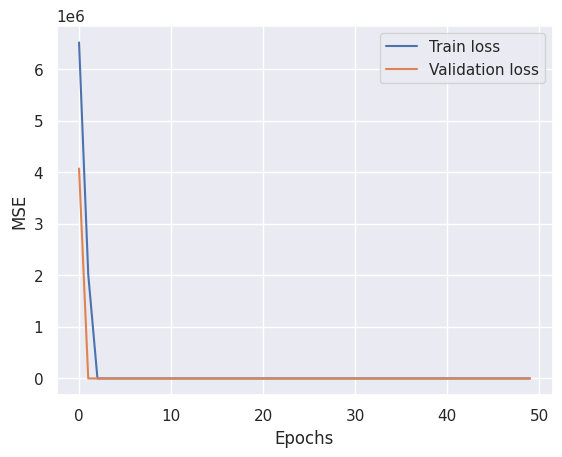

In [36]:
# plots
fig = plt.figure()
plt.plot(lstm_stacked_history.history['loss'], label='Train loss')
plt.plot(lstm_stacked_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

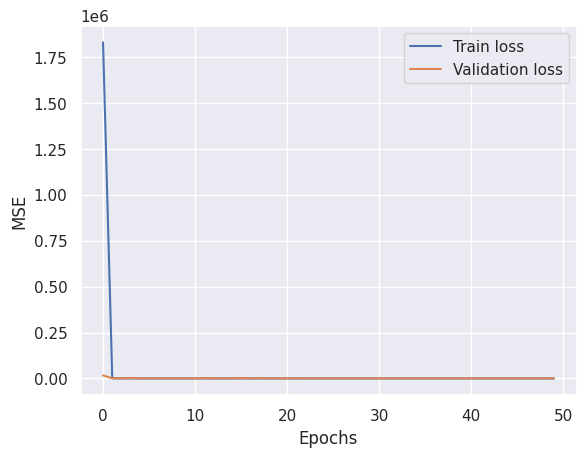

In [37]:
# plots
fig = plt.figure()
plt.plot(lstm_bidirectional_history.history['loss'], label='Train loss')
plt.plot(lstm_bidirectional_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [38]:
# RMSE calculation
from sklearn.metrics import mean_squared_error
lstm_vanilla_train_pred = model_lstm_vanilla.predict(X_train)
lstm_vanilla_test_pred = model_lstm_vanilla.predict(X_test)
print('Train rmse for vanilla:', np.sqrt(mean_squared_error(y_train, lstm_vanilla_train_pred)))
print('Test rmse for vanilla:', np.sqrt(mean_squared_error(y_test, lstm_vanilla_test_pred)))


lstm_stacked_train_pred = model_lstm_stacked.predict(X_train)
lstm_stacked_test_pred = model_lstm_stacked.predict(X_test)
print('Train rmse for stacked:', np.sqrt(mean_squared_error(y_train, lstm_stacked_train_pred)))
print('Test rmse for stacked:', np.sqrt(mean_squared_error(y_test, lstm_stacked_test_pred)))


lstm_bidirectional_train_pred = model_lstm_bidirectional.predict(X_train)
lstm_bidirectional_test_pred = model_lstm_bidirectional.predict(X_test)
print('Train rmse for bidirectional:', np.sqrt(mean_squared_error(y_train, lstm_bidirectional_train_pred)))
print('Test rmse for bidirectional:', np.sqrt(mean_squared_error(y_test, lstm_bidirectional_test_pred)))

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train rmse for vanilla: 2662.9986487738015
Test rmse for vanilla: 2414.888287517133
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train rmse for stacked: 11.417497193996397
Test rmse for stacked: 17.492295454153933
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train rmse for bidirectional: 10.508966431020102
Test rmse for bidirectional: 19.141792198603287


In [39]:
print(y_test[0:10])
print(lstm_vanilla_test_pred[0:10])

[2592.   2590.   2588.4  2588.5  2589.6  2589.   2591.5  2591.2  2591.15
 2590.15]
[[2.0589116]
 [2.0589116]
 [2.0589116]
 [2.0589116]
 [2.0589116]
 [2.0589116]
 [2.0589118]
 [2.0589118]
 [2.0589118]
 [2.0589118]]


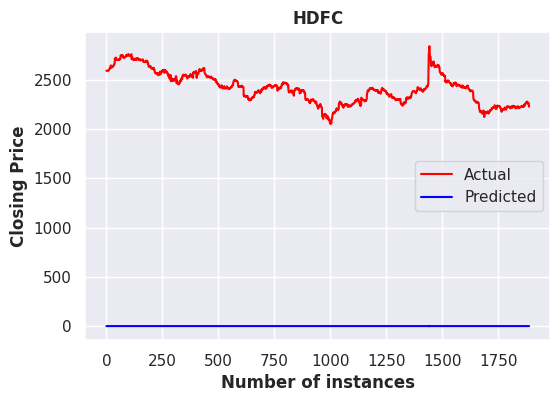

In [42]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("HDFC", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_vanilla_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

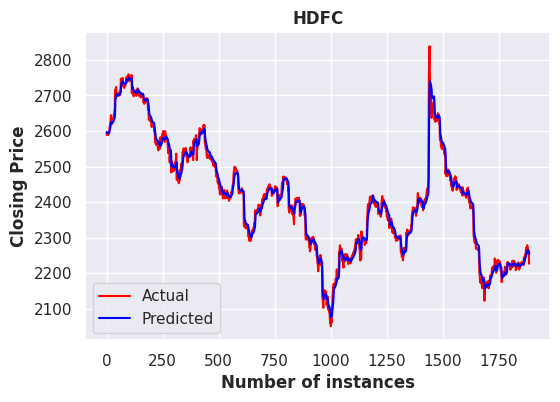

In [43]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("HDFC", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_stacked_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

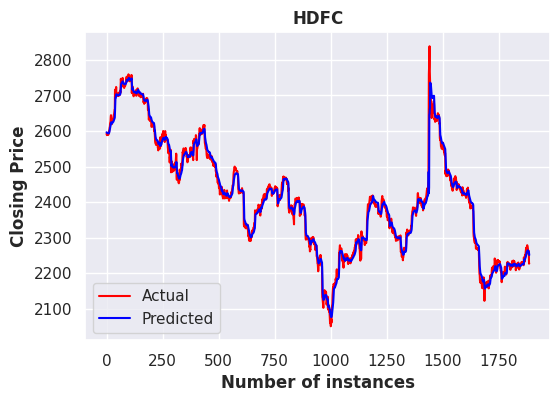

In [44]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("HDFC", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_bidirectional_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])